## Investigating The Causes of JAMB Failure Rates and Predicting Future Performance Trends (2020–2030)
Over the past five years, there has been a noticeable increase in the failure rate of students taking the Joint Admissions and Matriculation Board (JAMB) examination in Nigeria. This project aims to investigate the root causes of this trend through data-driven research and analysis. We will design and conduct a survey to gather relevant data, explore this data to identify key insights, build a predictive model to forecast success and failure rates over the next five years (2026–2030), and provide actionable recommendations to mitigate future failure rates.

### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### Load Dataset

In [3]:
file_path = 'JAMB_Survey_Data.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

df.head(5)

,Gender,Please enter your Email address,Age (at the time of your last JAMB exam),Year(s) you took the JAMB UTME,What is your current state of residence?,4. What type of secondary school did you attend?,What was your highest JAMB UTME score in any of the years you took the exam?,What course do you want to want to study?,Did you meet the cut-off mark for your preferred course?,How did you prepare for your exam?,...,Do you have access to internet at home?,How often did you practice using CBT before the exam?,Did you use a smartphone or computer to practice CBT before JAMB?,"On a scale of 1-5, how confident did you feel before the exam?","Was the JAMB exam center well-equipped (systems, power, environment)?",Did JAMB provide adequate resource materials for the exam preparation?,Did you face any of the following challenges on exam day?,Do you believe your score reflected your ability?,"In your opinion, what were the main reasons students perform poorly in JAMB?",What suggestions do you have to help improve JAMB success rates?
0,Male,***************@gmail.com,16-17,2024,Rivers,Private,250,Engineering,Yes,Studied Independently,...,Yes,Sometimes,Yes - only phone,2,Yes,Yes,NaN,No,Lack of proper preparation,Good
1,Male,***************@gmail.com,18-19,2024,Rivers,Private,216,Engineering,Yes,Studied Independently,...,Yes,Rarely,Yes - only phone,5,Yes,Yes,NaN,Yes,Poor teaching,Adequate facilities for study
2,Male,***************@gmail.com,16-17,2020,Rivers,Private,200,Computer science,Yes,Studied Independently,...,Yes,Always,Yes - only phone,5,No,No,"Delay in starting the exam, Poor ventilation ...",No,"Less materials, power outage, network, less pr...","Use good exam centers after thorough checks, t..."
3,Female,***************@gmail.com,22-24,2020,Cross River,Private,201,Sociology,Yes,School lessons,...,Yes,Rarely,Yes - only phone,3,Yes,Yes,Delay in starting the exam,Yes,Fear,Be confident in your self
4,Male,***************@gmail.com,20-21,2023,Rivers,Private,191,Chemistry,Yes,Studied Independently,...,Yes,Rarely,Yes - only phone,1,Yes,Yes,"Delay in starting the exam, Power outage",Not really.,"No proper preparation, and tension.",Reduction of cutoff marks.


### Data Inspection


In [4]:
print("Shape of dataset:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nFirst few rows:")
display(df.head())

Shape of dataset: (1004, 22)

Data types:
Gender                                                                          object
Please enter your Email address                                                 object
Age (at the time of your last JAMB exam)                                        object
Year(s) you took the JAMB UTME                                                   int64
What is your current state of residence?                                        object
4. What type of secondary school did you attend?                                object
What was your highest JAMB UTME score in any of the years you took the exam?     int64
What course do you want to want to study?                                       object
Did you meet the cut-off mark for your preferred course?                        object
How did you prepare for your exam?                                              object
How many hours per day did you study in the 3 months before your JAMB exam?     object
W

,Gender,Please enter your Email address,Age (at the time of your last JAMB exam),Year(s) you took the JAMB UTME,What is your current state of residence?,4. What type of secondary school did you attend?,What was your highest JAMB UTME score in any of the years you took the exam?,What course do you want to want to study?,Did you meet the cut-off mark for your preferred course?,How did you prepare for your exam?,...,Do you have access to internet at home?,How often did you practice using CBT before the exam?,Did you use a smartphone or computer to practice CBT before JAMB?,"On a scale of 1-5, how confident did you feel before the exam?","Was the JAMB exam center well-equipped (systems, power, environment)?",Did JAMB provide adequate resource materials for the exam preparation?,Did you face any of the following challenges on exam day?,Do you believe your score reflected your ability?,"In your opinion, what were the main reasons students perform poorly in JAMB?",What suggestions do you have to help improve JAMB success rates?
0,Male,***************@gmail.com,16-17,2024,Rivers,Private,250,Engineering,Yes,Studied Independently,...,Yes,Sometimes,Yes - only phone,2,Yes,Yes,NaN,No,Lack of proper preparation,Good
1,Male,***************@gmail.com,18-19,2024,Rivers,Private,216,Engineering,Yes,Studied Independently,...,Yes,Rarely,Yes - only phone,5,Yes,Yes,NaN,Yes,Poor teaching,Adequate facilities for study
2,Male,***************@gmail.com,16-17,2020,Rivers,Private,200,Computer science,Yes,Studied Independently,...,Yes,Always,Yes - only phone,5,No,No,"Delay in starting the exam, Poor ventilation ...",No,"Less materials, power outage, network, less pr...","Use good exam centers after thorough checks, t..."
3,Female,***************@gmail.com,22-24,2020,Cross River,Private,201,Sociology,Yes,School lessons,...,Yes,Rarely,Yes - only phone,3,Yes,Yes,Delay in starting the exam,Yes,Fear,Be confident in your self
4,Male,***************@gmail.com,20-21,2023,Rivers,Private,191,Chemistry,Yes,Studied Independently,...,Yes,Rarely,Yes - only phone,1,Yes,Yes,"Delay in starting the exam, Power outage",Not really.,"No proper preparation, and tension.",Reduction of cutoff marks.


### Data Cleaning

In [6]:
# 1. Creating a copy for cleaning
df_cleaned = df.copy()

# 2. Renaming Columns
df_cleaned.columns = [
    "Gender", "Email", "Age", "Exam_Year", "State", "School_Type", "JAMB_Score",
    "Preferred_Course", "Met_Cutoff", "Prep_Method", "Study_Hours", "Family_Income",
    "Internet_Access", "CBT_Practice_Frequency", "CBT_Device", "Confidence_Level",
    "Center_Equipped", "Resources_Provided", "Exam_Day_Challenges", "Score_Reflection",
    "Poor_Performance_Reasons", "Suggestions"
]

# 3. Removing/Striping whitespaces
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = df_cleaned[col].map(lambda x: x.strip() if isinstance(x, str) else x)

# 4. Creating a binary outcome: Passed_JAMB (cut-off score 200)
df_cleaned["Passed_JAMB"] = df_cleaned["JAMB_Score"].apply(lambda x: 1 if x >= 200 else 0)

# 5. Creating a binary outcome: Met_Cutoff (cut-off score 200)
df_cleaned["Met_Cutoff_Binary"] = df_cleaned["Met_Cutoff"].apply(lambda x: 1 if str(x).lower().strip() == "yes" else 0)

# 6. Mapping age ranges to numeric estimates
age_map = {
    "16-17": 16.5, "18-19": 18.5, "20-21": 20.5, "22-24": 23, 
    "25-27": 26, "28-30": 29, "30+": 32
}
df_cleaned["Age_Estimate"] = df_cleaned["Age"].map(age_map)

# 7. Converting study hours to estimate value
def convert_hours(value):
    val = value.strip().lower()
    if "less than" in val or val == "0-1":
        return 1
    elif "2-3" in val:
        return 2.5
    elif "4-5" in val:
        return 4.5
    elif "6+" in val or "more than 6" in val:
        return 6.5
    else:
        return None

df_cleaned["Study_Hours_Num"] = df_cleaned["Study_Hours"].apply(convert_hours)

# 8. Dispaly cleaned data
df_cleaned.head(5)

,Gender,Email,Age,Exam_Year,State,School_Type,JAMB_Score,Preferred_Course,Met_Cutoff,Prep_Method,...,Center_Equipped,Resources_Provided,Exam_Day_Challenges,Score_Reflection,Poor_Performance_Reasons,Suggestions,Passed_JAMB,Met_Cutoff_Binary,Age_Estimate,Study_Hours_Num
0,Male,***************@gmail.com,16-17,2024,Rivers,Private,250,Engineering,Yes,Studied Independently,...,Yes,Yes,NaN,No,Lack of proper preparation,Good,1,1,16.5,NaN
1,Male,***************@gmail.com,18-19,2024,Rivers,Private,216,Engineering,Yes,Studied Independently,...,Yes,Yes,NaN,Yes,Poor teaching,Adequate facilities for study,1,1,18.5,1.0
2,Male,***************@gmail.com,16-17,2020,Rivers,Private,200,Computer science,Yes,Studied Independently,...,No,No,"Delay in starting the exam, Poor ventilation ...",No,"Less materials, power outage, network, less pr...","Use good exam centers after thorough checks, t...",1,1,16.5,1.0
3,Female,***************@gmail.com,22-24,2020,Cross River,Private,201,Sociology,Yes,School lessons,...,Yes,Yes,Delay in starting the exam,Yes,Fear,Be confident in your self,1,1,23.0,NaN
4,Male,***************@gmail.com,20-21,2023,Rivers,Private,191,Chemistry,Yes,Studied Independently,...,Yes,Yes,"Delay in starting the exam, Power outage",Not really.,"No proper preparation, and tension.",Reduction of cutoff marks.,0,1,20.5,NaN


###  Exploratory Data Analysis (EDA)

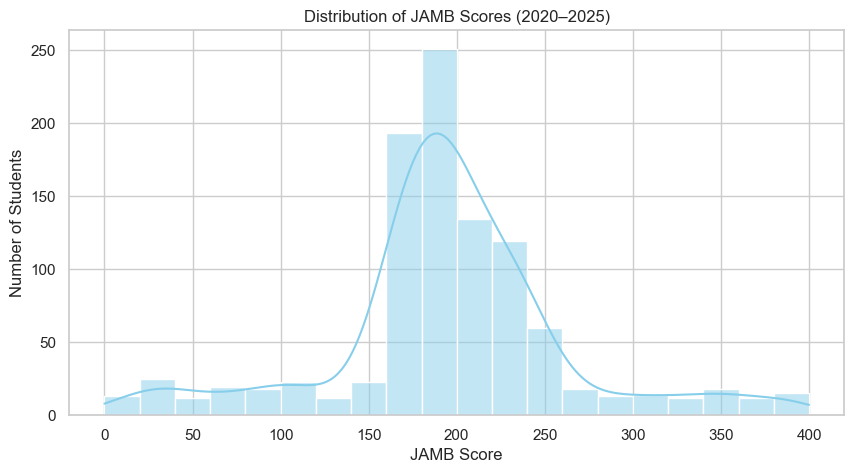

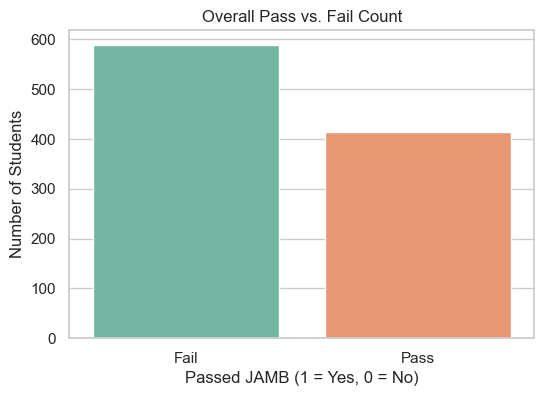

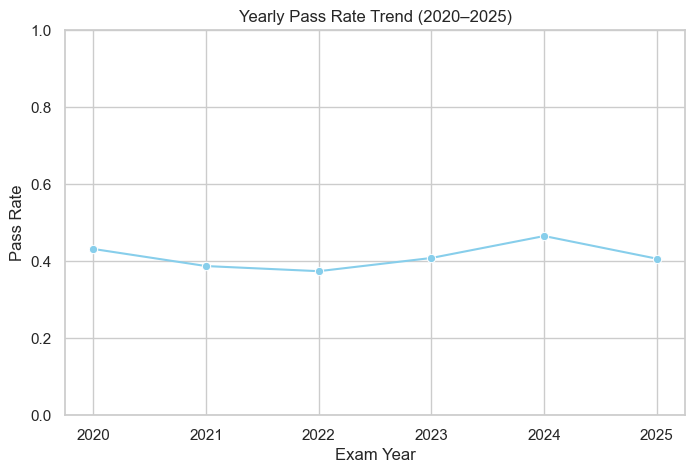

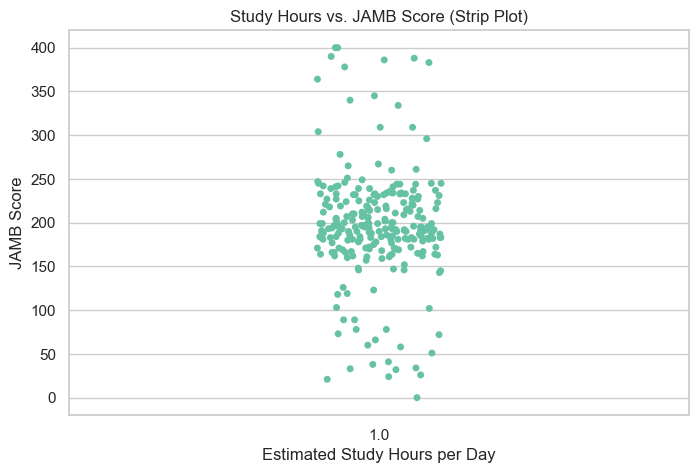

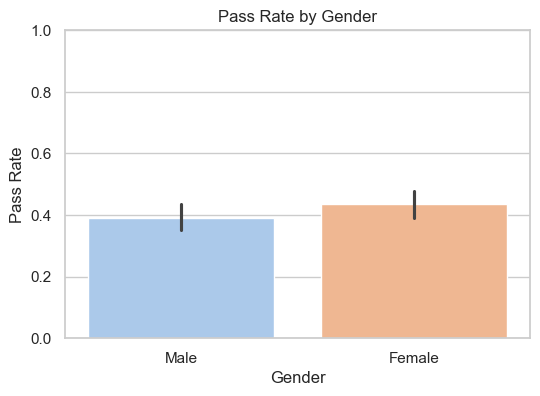

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# 1. JAMB Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df_cleaned, x="JAMB_Score", kde=True, bins=20, color="skyblue")
plt.title("Distribution of JAMB Scores (2020–2025)")
plt.xlabel("JAMB Score")
plt.ylabel("Number of Students")
plt.show()

# 2. Pass vs. Fail Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x="Passed_JAMB", hue="Passed_JAMB", palette="Set2", legend=False)
plt.title("Overall Pass vs. Fail Count")
plt.xlabel("Passed JAMB (1 = Yes, 0 = No)")
plt.ylabel("Number of Students")
plt.xticks([0, 1], ["Fail", "Pass"])
plt.show()

# 3. Yearly Pass Rate
yearly_pass_rate = df_cleaned.groupby("Exam_Year")["Passed_JAMB"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=yearly_pass_rate, x="Exam_Year", y="Passed_JAMB", marker="o", color="skyblue")
plt.title("Yearly Pass Rate Trend (2020–2025)")
plt.ylabel("Pass Rate")
plt.xlabel("Exam Year")
plt.ylim(0, 1)
plt.show()

# 4. Study Hours vs. JAMB Score
plt.figure(figsize=(8, 5))
sns.stripplot(data=df_cleaned, x="Study_Hours_Num", y="JAMB_Score", hue="Study_Hours_Num", palette="Set2", jitter=True, legend=False)
plt.title("Study Hours vs. JAMB Score (Strip Plot)")
plt.xlabel("Estimated Study Hours per Day")
plt.ylabel("JAMB Score")
plt.show()

# 5. Gender vs. Pass Rate
plt.figure(figsize=(6, 4))
sns.barplot(data=df_cleaned, x="Gender", y="Passed_JAMB", hue="Gender", palette="pastel", legend=False)
plt.title("Pass Rate by Gender")
plt.ylabel("Pass Rate")
plt.xlabel("Gender")
plt.ylim(0, 1)
plt.show()



### Visualizations

1. **Overall Pass vs. Fail Count**:
   - **Bar Chart**: Showing the overall count of students who passed versus those who failed the JAMB exam.
   - **Insight**: This visualization provides a clear picture of the overall performance trend, highlighting the number of students who successfully met the cut-off marks versus those who did not.
   - **Visualization**: A bar chart with two bars (one for pass and one for fail) illustrating the overall pass and fail counts.

2. **Distribution of JAMB Scores**:
   - **Histogram**: Showing the frequency of scores in different ranges.
   - **Insight**: The majority of students score between 150 and 250, with a notable peak around 200.
   - **Visualization**: A bar chart displaying the frequency of scores in different ranges, highlighting the concentration of scores around the 200 mark.

3. **Pass Rate by Gender**:
   - **Bar Chart**: Comparing the pass rates of male and female students.
   - **Insight**: Female students show a slightly higher pass rate compared to male students.
   - **Visualization**: A bar chart with two bars (one for male and one for female) illustrating the pass rates, showing a small but noticeable difference.

4. **Yearly Pass Rate Trends**:
   - **Line Graph**: Tracking the pass rate over the years from 2020 to 2025.
   - **Insight**: The trend shows a gradual improvement, indicating that recent cohorts are performing better.
   - **Visualization**: A line graph with years on the x-axis and pass rates on the y-axis, showing an upward trend.

5. **Study Hours and Performance**:
   - **Scatter Plot**: Showing the relationship between study hours and JAMB scores.
   - **Insight**: There is a positive correlation, suggesting that more study hours generally lead to higher scores.
   - **Visualization**: A scatter plot with study hours on the x-axis and JAMB scores on the y-axis, showing a positive trend.

### Conclusion

The EDA provides a comprehensive view of the JAMB UTME landscape, revealing key insights into student performance and the challenges they face. These visualizations bring the data to life, making it easier to understand and interpret. By sharing these insights, we can better inform strategies to improve JAMB performance outcomes and ensure a brighter future for all students.